<a href="https://colab.research.google.com/github/UoR-Vision/VisualDota/blob/main/src/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

***
<a id="colab"></a>
## Adapting to the Colab Operating Environment

In Colab environment, it is neccessary to download the whole project from Github.

In [15]:
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

if is_colab():
    print("Running in Google Colab!")
    !git clone https://github.com/UoR-Vision/VisualDota.git -b main
    %cd VisualDota/src
else:
    print("Not running in Colab.")

Running in Google Colab!
Cloning into 'VisualDota'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 60 (delta 9), reused 0 (delta 0), pack-reused 38 (from 2)
Receiving objects: 100% (60/60), 122.09 MiB | 22.21 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (30/30), done.
/content/VisualDota/src/VisualDota/src/VisualDota/src


***
<a id="hotload"></a>
## Hot Loading .py File

Here is to import custom .py file. It can be hot-loaded, just re-run the following cell.

Documentation comments are provided for each public function. To check the comments please use the help() function.

In [20]:
!pip install importlib
import importlib  # for hot-loaded .py file

try:
    import data_process  # import custom methods for data pre-processing
    import visual_utils  # import custom methods for visualization
except ModuleNotFoundError as e:
    print(f'[ERROR] fail to import a custom module at path: {os.path.abspath(".")}, msg: {e}.')
except Exception as e:
    print(f'[ERROR] fail to read module at path: {os.path.abspath(".")}, msg: {e}')
else:
    # Hot loading python files
    importlib.reload(data_process)
    importlib.reload(visual_utils)

***
<a id="import"></a>
## Import libraries

To import the required libraries for whole project.

In [24]:
# import the build-in required libraries
import os
import warnings

# import the third-part required libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter


# check the versions of third-part libraries
print(f'matplotlib: {matplotlib.__version__}, numpy: {np.__version__}')

matplotlib: 3.10.0, numpy: 2.0.2


# 2 Data Selection & Preprocessing

## Load Dataset

In [21]:
dataset = data_process.load_dataset()
len(dataset)

11

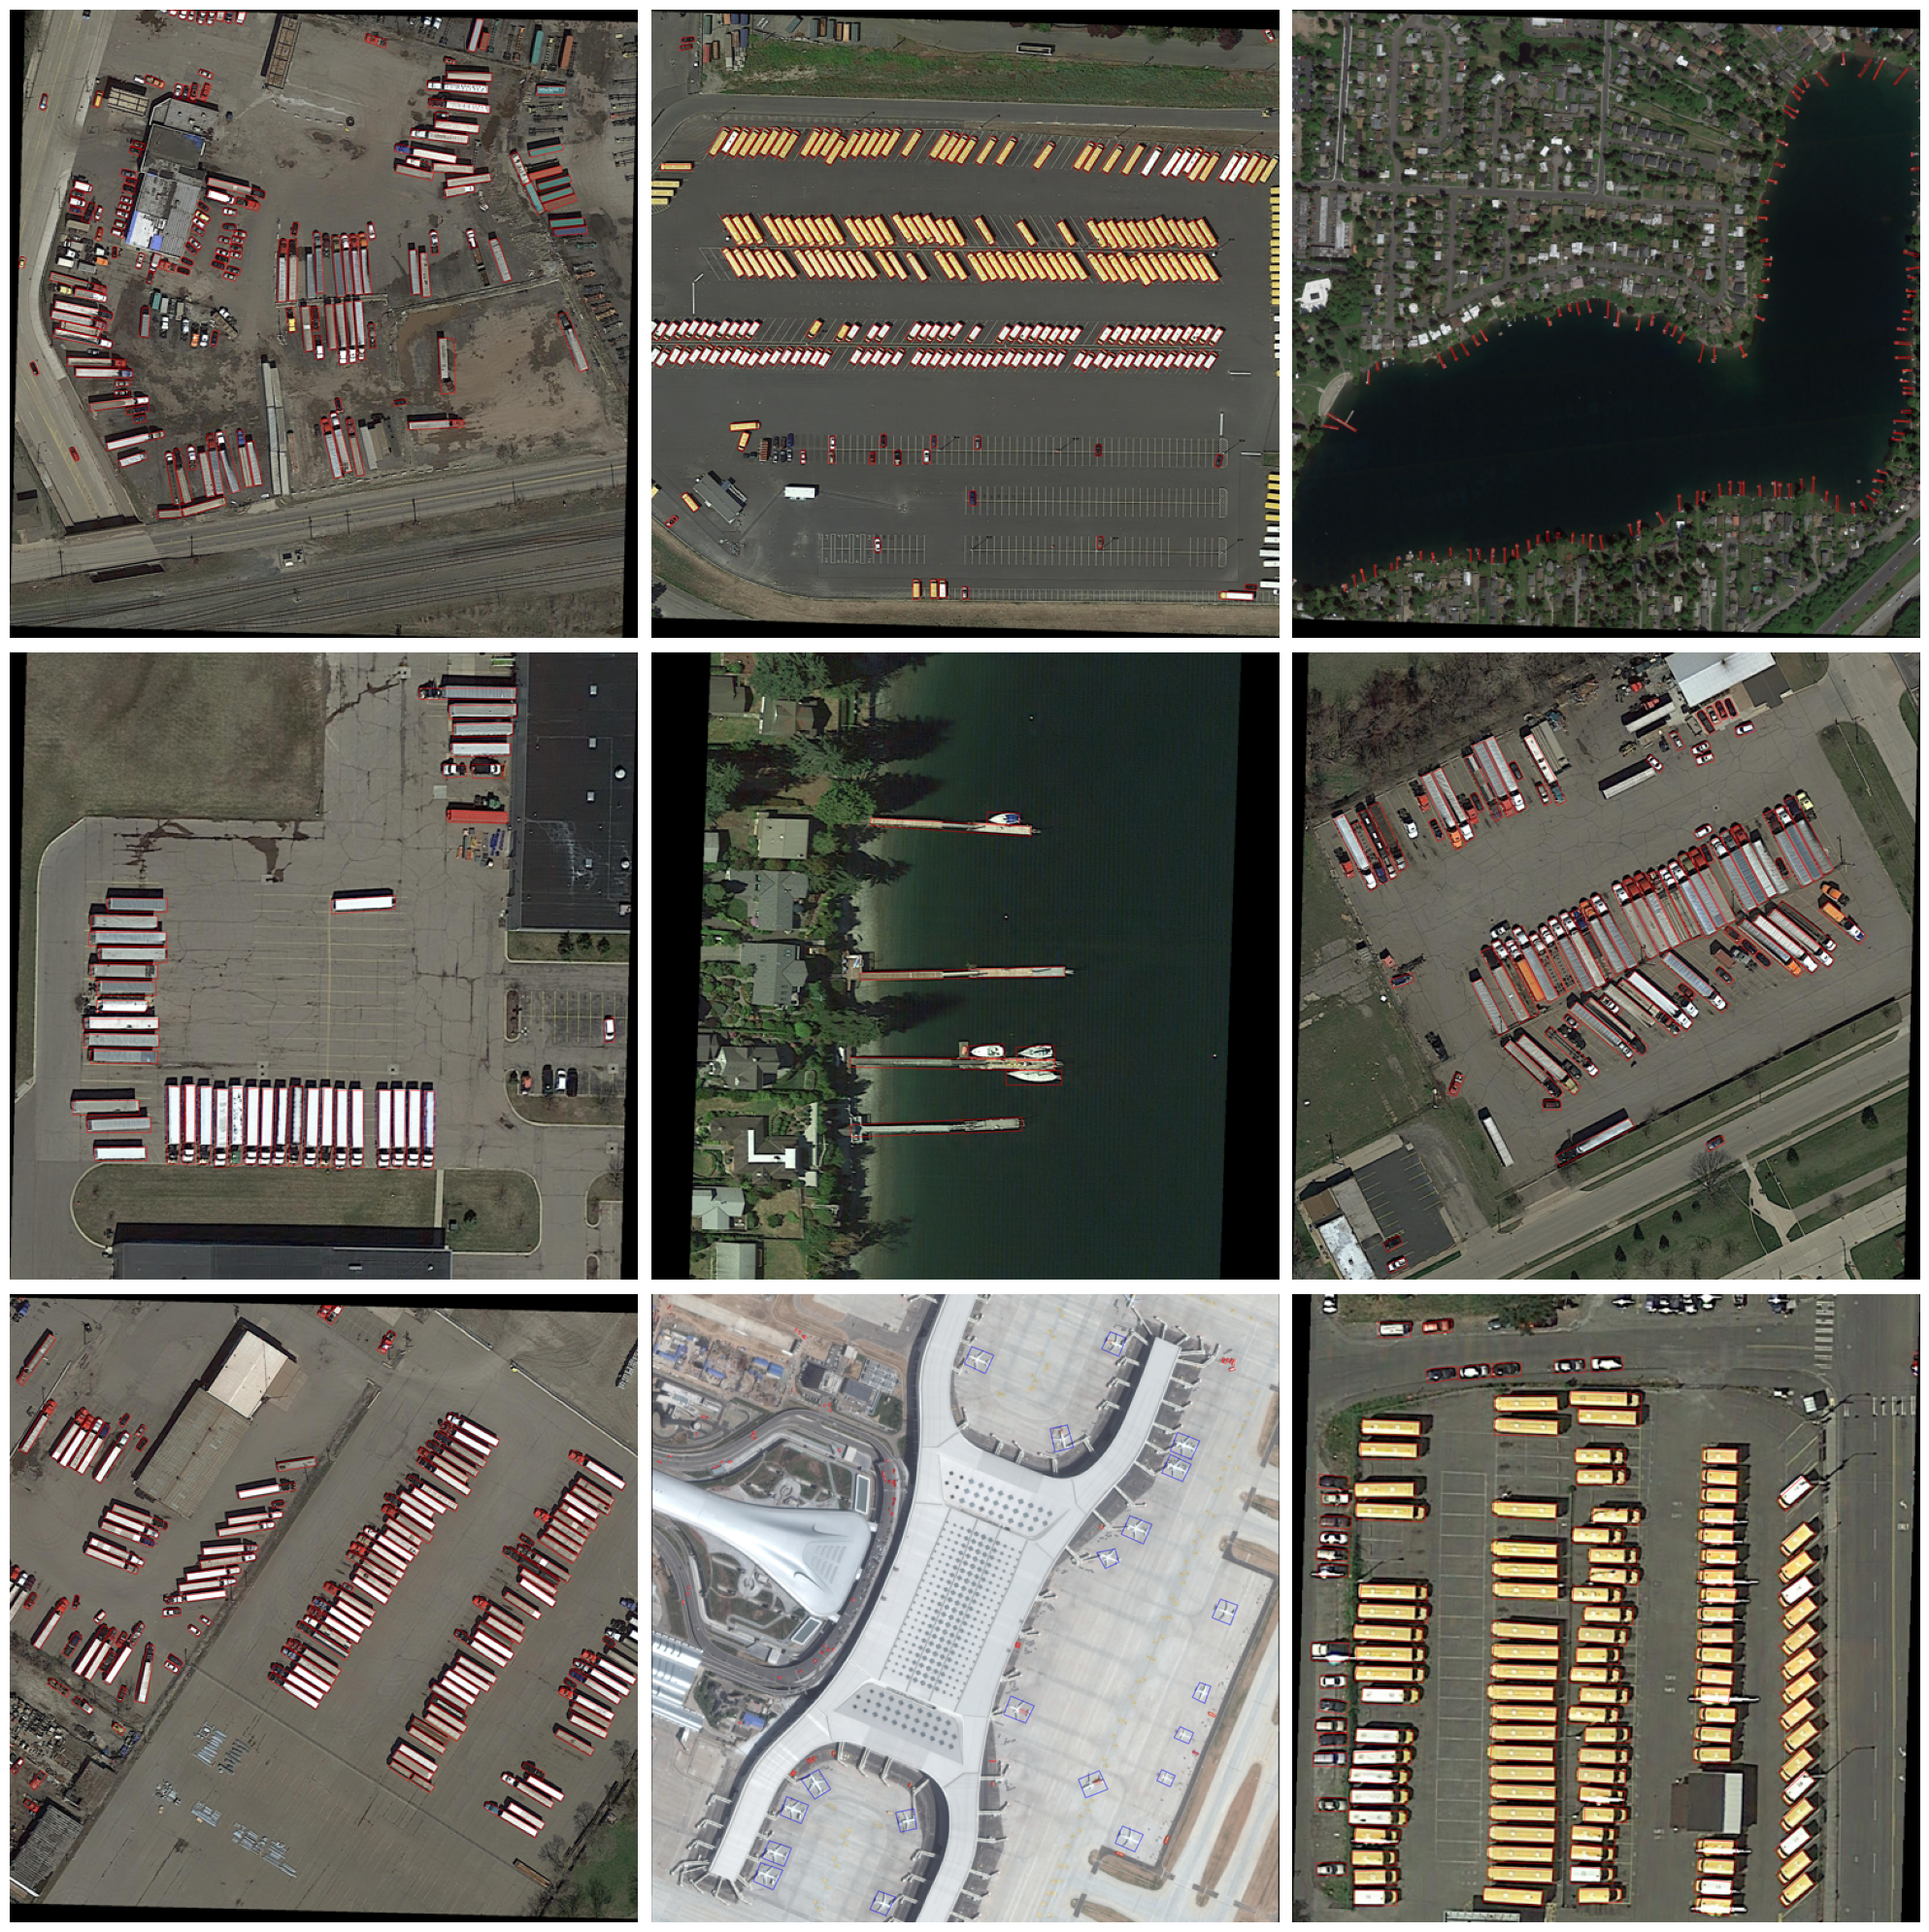

In [7]:
visual_utils.visualize_images(dataset)

In [8]:
labels = data_process.count_labels()
labels

[('large-vehicle', 735),
 ('small-vehicle', 365),
 ('harbor', 138),
 ('plane', 21),
 ('ship', 19),
 ('tennis-court', 4),
 ('ground-track-field', 1),
 ('soccer-ball-field', 1)]

# 3 Exploratory data analysis

## 3.1 Object Category Distribution

In [22]:
zip_path = "src/data/labelTxt.zip"
def category_generator(zip_path):
    with ZipFile(zip_path, 'r') as zip_file:
        for file_name in zip_file.namelist():
            if file_name.endswith('.txt'):
                with zip_file.open(file_name) as file:
                    for line in file:
                        parts = line.decode('utf-8').strip().split(',')
                        if len(parts) >= 10:
                            yield parts[8].strip()

# Use generator to collect counts
category_counts = Counter(category_generator(zip_path))

FileNotFoundError: [Errno 2] No such file or directory: 'src/data/labelTxt.zip'

In [23]:
zip_path = os.path.abspath("src/data/labelTxt.zip")
print(zip_path)

/content/VisualDota/src/VisualDota/src/VisualDota/src/src/data/labelTxt.zip


# 4 Modelling

# 5 Evaluation

# Summary